Shonkwiler & Mendivil, Exercise 14, page 96. (Sampling bias for bus waiting times)
Suppose the interarrival time for a city bus has an exponential distribution with
parameter 1/λ. A passenger arrives at a uniformly random time and records the time until
the next bus arrives. What is the expected waiting time? Use a simulation to get an
answer. Is the answer surprising? Now suppose instead that the interarrival time is U (0,
2λ). How does this change the situation? (Notice that the expected interarrival time is λ
in both cases.)
Note that there are 2 common, equivalent parameterizations of the exponential
distribution.

○ Exponential( x  | $\lambda$ ) =  $\lambda  e ^{–\lambda x}$
. This is used in Shonkwiler & Mendivil.


○ Exponential( x  |  $\beta$ ) =  $\beta ^{–1} e ^{–x / \beta}$ 

This is used in Scipy. So if you import scipy and
generate exponentially distributed random values using
scipy.random.exponential(beta), you should use $\beta  =  \lambda ^{–1}$
.

In [12]:
import scipy
import random as rd
import numpy as np
import matplotlib.pyplot as plt

def waitbus(beta, p_pass, t = 10000):
    passengers = []
    wait_times = []
    bus = -0.1
    for t in range(int(t)):
        #passenger
        if rd.random() < p_pass: passengers.append(t)
        #bus arrived
        if bus < t : 
            for waiting in passengers: wait_times.append(t - waiting)
            passengers = []
            bus += scipy.random.exponential(beta)
                       
    return wait_times
            
    

In [7]:
print "Expected value: " , np.mean(waitbus(beta = 10, p_pass = 0.1, t = 1e5))

Expected value:  9.47720698254


Shonkwiler & Mendivil, Exercise 24, page 98 (Retirement benefit projection) At age 50 Fannie Mae has \$150,000 invested and will be investing another $10,000 per year until age 70. Each year the investment grows according to an interest rate that is normally distributed with mean 8% and standard deviation 9%. At age 70, Fannie Mae then retires and withdraws \$65,000 per year until death. Below is given a conditional death probability table. Thus if Fannie Mae lives until age 70, then the probability of dying before age 71 is 0.04979. Simulate this process 1000 times and histogram the amount of money Fannie Mae has at death.

In [8]:
data = {
50: 0.00832, 51: 0.00911, 52: 0.00996, 53: 0.01089, 54: 0.01190,
55: 0.01300, 56: 0.01421, 57: 0.01554, 58: 0.01700, 59: 0.01859,
60: 0.02034, 61: 0.02224, 62: 0.02431, 63: 0.02657, 64: 0.02904,
65: 0.03175, 66: 0.03474, 67: 0.03804, 68: 0.04168, 69: 0.04561,
70: 0.04979, 71: 0.05415, 72: 0.05865, 73: 0.06326, 74: 0.06812,
75: 0.07337, 76: 0.07918, 77: 0.08570, 78: 0.09306, 79: 0.10119,
80: 0.10998, 81: 0.11935, 82: 0.12917, 83: 0.13938, 84: 0.15001,
85: 0.16114, 86: 0.17282, 87: 0.18513, 88: 0.19825, 89: 0.21246,
90: 0.22814, 91: 0.24577, 92: 0.26593, 93: 0.28930, 94: 0.31666,
95: 0.35124, 96: 0.40056, 97: 0.48842, 98: 0.66815, 99: 0.72000,
100: 0.76000, 101: 0.80000, 102: 0.85000, 103: 0.90000,
104: 0.96000, 105: 1.00000}

In [11]:
def fannie(mortality_list):
    investment = 150000
    age = 50
    p_death = rd.random()
    
    while p_death > mortality_list[age]:
        if age < 70: investment += 10000
        else: investment -= 65000
        interest = scipy.random.normal(0.08, 0.09)
        investment *= 1 + interest
        age += 1
    return investment

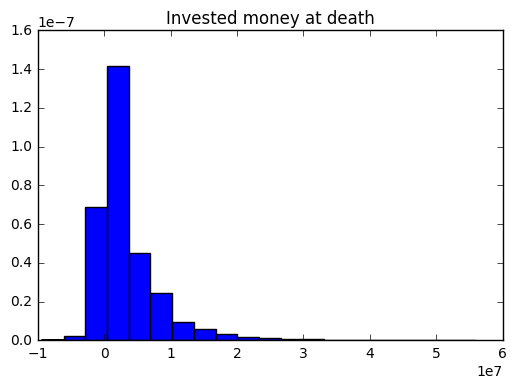

In [14]:
plt.hist([fannie(data) for _ in range(1000)], normed=True, bins=20)
plt.title("Invested money at death")
plt.show()